## Lesson 1

Here we **import** the **libraries** numpy and matplotlib. Libraries are collections of someone else's code that does useful things for us. We must first install this code on our computer (by typing "pip install numpy" into the terminal) and then **import** it into our programme, like importing silk or tea into a country.

In [ ]:
# DO NOT CHANGE THIS CODE

import numpy as np # NOTE to self: must get numpy installed for students
import matplotlib.pyplot as plt # ditto must get matplotlib installed for students


### Taller people have bigger feet! Let's see if we can predict a person's height using their shoe size.

### In the lists below, you should record every other student's shoe size and height but NOT your own

In [ ]:
# DO NOT CHANGE THIS CODE!
np.random.seed(42)


shoe_size = np.random.randint(180, 300, 40)  # shoe sizes from 220mm to 300mm


shoe_size = np.array([42.5,
             41.5,
             43,
             37,
             38,
             37,
             36,
             42,])

height = ([168.5,
          171.5,
          175,
          156,
          163.5,
          159,
          147,
          166])


# Here we are cheating - really we should just measure the actual height and shoe size of real people but I'm making up some data
# (I'm allowed to do this because it's an example - in real science we're not allowed to make up data!)
# height = 0.5 * shoe_size + 50 + np.random.normal(scale=5, size=shoe_size.shape) 

training_x = shoe_size  # First 30 people's shoe sizes are our training x data - the "independent variable" - remember Python lists start counting at 0
training_y = height  # First 30 people's heights are our training y data - the "dependent variable"


plt.scatter(training_x, training_y, label='Training Data') #
# plt.scatter(test_x, test_y, label='Test Data', color='orange') 
plt.legend()
plt.xlabel('Shoe Size (mm)')
plt.ylabel('Height (cm)')
plt.show()

### Here we make an extremely simple "AI" which tries to predict someon's height based on their shoe size. Our **model** or **architecture** is just a single straight line. 

### This AI model has two controls we can tune - a single "weight" (an AI word meaning slope) and a single "bias" (an AI word meaning intercept).

### We can train our model by looking at it - try a few different values of "weight" and "bias" and make the line fit the data as well as you can.

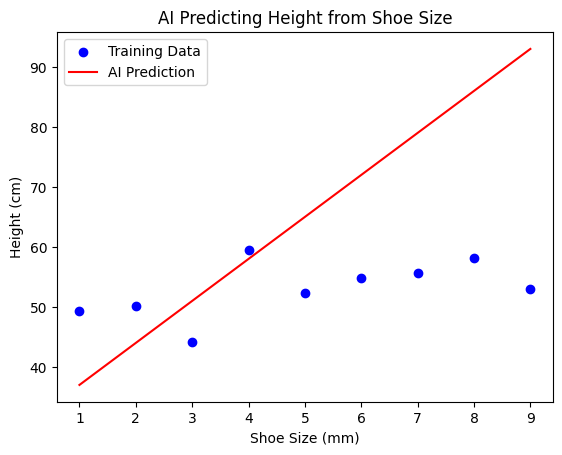

In [29]:
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# CHANGE THIS CODE!
# Try changing the value of "weight" (the slope) and "bias" (the intercept) below to see how good we can make the fit.
weight = 7 # Initial guess for slope - weight is a special word in AI, which is nothing to do with how fat someone is!!!
bias = 30  # Initial guess for intercept - bias is another special word in AI, it has two meanings which we should discuss in class. Please ask me about it!

# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

# DO NOT CHANGE THIS CODE!
plt.figure()

plt.scatter(training_x, training_y, label='Training Data', color='blue')  # This is the data we have trained our AI on
plt.plot(shoe_size, weight * shoe_size + bias, label="AI Prediction", color='red')  # This is what we have trained our AI to predict
plt.xlabel('Shoe Size (mm)')
plt.ylabel('Height (cm)')
plt.title(f'AI Predicting Height from Shoe Size')
plt.legend()
plt.show()

# ----
# Adjust the values of weight (slope) and bias (intercept) below,
# then re-run this cell to see the updated fit.


# Plot the result


### The magic behind machine learning/artificial intelligence is that rather than changing the settings by hand, we can make a computer change the settings for us.

### **Ask me about the loss function and gradient descent - we can be infinitely wrong but we can only be so right (0 wrong)**

In [ ]:
# DO NOT CHANGE THIS CODE

# Here we describe our simple AI model as a class.
# class is like a blueprint for a building - it tells the computer how to create an AI model

class SimpleAI:
    def __init__(self, weight=0.7, bias=40.0):
        self.weight = weight
        self.bias = bias

    def predict(self, x):
        return self.weight * x + self.bias
    
    def loss(self, x, y):
        predictions = self.predict(x)
        return np.mean((predictions - y) ** 2)
    
    def train_one_step(self, x, y, learning_rate=0.1):
        predictions = self.predict(x)
        error = predictions - y
        
        # Calculate gradients
        weight_gradient = np.mean(2* error * x)
        bias_gradient = np.mean(error)
        
        # Update parameters
        self.weight -= learning_rate * weight_gradient * 0.0001 # This 0.0001 is a special trick I put in there because training AI is complicated! See what happens if you change it!
        self.bias -= learning_rate * bias_gradient 

    def show_prediction(self, x, training_x, training_y):
        plt.figure()
        plt.scatter(training_x, training_y, label='Training Data', color='blue')
        plt.plot(x, self.predict(x), label="AI Prediction", color='red')
        plt.xlabel('Shoe Size (mm)')
        plt.ylabel('Height (cm)')
        plt.title(f'AI Predicting Height from Shoe Size\nWeight: {self.weight:.2f}, Bias: {self.bias:.2f}, Loss: {self.loss(training_x, training_y):.2f}')
        plt.legend()
        plt.show()


### Run the below code once to reset our model

In [ ]:
# DO NOT CHANGE THIS CODE

# Run this code ONCE every time you want to reset the AI model

HeightFromShoeSizeAI = SimpleAI() # Here we create an "instance" of our AI class 
print(f"weight: {HeightFromShoeSizeAI.weight}, bias: {HeightFromShoeSizeAI.bias}")

HeightFromShoeSizeAI.show_prediction(shoe_size, training_x, training_y)


In [ ]:
# DO NOT CHANGE THIS CODE

# Run this code several times and watch what happens to the weight and bias - they get changed to better choices!
# Notice also how the loss gets smaller and smaller - this is how we know our AI is learning!

HeightFromShoeSizeAI.train_one_step(training_x, training_y, learning_rate=1)
print(f"weight: {HeightFromShoeSizeAI.weight}, bias: {HeightFromShoeSizeAI.bias}")
print(f'loss: {HeightFromShoeSizeAI.loss(training_x, training_y)}')



HeightFromShoeSizeAI.show_prediction(shoe_size, training_x, training_y)


In [ ]:
# DO NOT CHANGE THIS CODE

model = SimpleAI() # Create a new **instance** of our AI model - an instance is like an actual building vs the blueprint of the class
params = [(model.weight, model.bias, model.loss(training_x, training_y))]
for i in range(9):
    model.train_one_step(training_x, training_y, learning_rate=1)
    params.append((model.weight, model.bias, model.loss(training_x, training_y)))

# Plot progress in a 2x5 grid
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
axes = axes.flatten()
for idx, (w, b, loss) in enumerate(params):
    ax = axes[idx]
    ax.scatter(training_x, training_y, label='Training Data', color='blue')
    ax.plot(shoe_size, w * shoe_size + b, label="AI Prediction", color='red')
    ax.set_title(f"Step {idx}, Loss={loss:.2f}\nw={w:.2f}, b={b:.2f}")
    ax.set_xlabel("Shoe Size (mm)")
    ax.set_ylabel("Height (cm)")
    ax.grid(True)
plt.tight_layout()
plt.show()


## We can now see how well our AI works - now try putting in YOUR shoe size and height!

In [ ]:
MyShoeSize = 40
MyHeight = 165
AI_Predicted_Height = model.predict(MyShoeSize)

print(AI_Predicted_Height)

plt.scatter([MyShoeSize], [MyHeight], color='green', label='My Real Height')
plt.scatter([MyShoeSize], [AI_Predicted_Height], color='red', label='AI Predicting My Height', marker='^', linewidths=5)
plt.scatter(training_x, training_y, label='Training Data', color='blue')
plt.plot(shoe_size, model.weight * shoe_size + model.bias, label="AI Model", color='red', alpha=0.5)
plt.xlabel('Shoe Size (mm)')
plt.ylabel('Height (cm)')
plt.legend()
plt.show()

In [ ]:
# DO NOT CHANGE THIS CODE

# Here we take a look at the loss surface around our model's parameters

newmodel = SimpleAI(weight=0.5, bias=50)

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assumes `model`, `x`, and `y` are already defined in the notebook.

# 1) Define parameter grid around weight=0.5±0.25 and bias=50±10
w_vals = np.linspace(0.5, 2, 50)
b_vals = np.linspace(50, 180, 50)
W, B = np.meshgrid(w_vals, b_vals)

# 2) Compute loss for each (weight, bias) pair using model.loss
Loss = np.zeros_like(W)
for i in range(W.shape[0]):
    for j in range(W.shape[1]):
        newmodel.weight = W[i, j]
        newmodel.bias   = B[i, j]
        Loss[i, j] = newmodel.loss(training_x, training_y)


min_idx = np.unravel_index(np.argmin(Loss), Loss.shape)
w_min, b_min, loss_min = W[min_idx], B[min_idx], Loss[min_idx]



# 3) Plot the 3D loss surface
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(projection='3d')
surface = ax.plot_surface(W, B, Loss, cmap='viridis', alpha=0.7)
ax.set_xlabel('weight')
ax.set_ylabel('bias')
ax.set_zlabel('(log) MSE Loss')

# Highlight the minimum
ax.scatter(w_min, b_min, loss_min, color='red', s=50, marker='^', linewidths=1, zorder=10)
ax.text(w_min, b_min, loss_min, 
        f'Min\n(w={w_min:.3f}, b={b_min:.2f}, loss={loss_min:.2f})',
        color='red', fontsize=10)


fig.colorbar(surface, shrink=0.5, aspect=10, label='Loss', orientation='vertical')



plt.tight_layout()
plt.show()
